In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools

## 数据载入 ##

### FP data ###

In [2]:
tag_file = './tongue_FP.csv'
tag = pd.read_csv(tag_file)
tag.head(6)

,model,face,inhouse,nature,tongueDetect,tonguePrecision
0,xml_yy_10,0.740,0.360,0.214,0.965,0.60
1,xml_2000_10,0.410,0.240,0.188,0.940,0.85
2,xml_yy_50,0.505,0.140,0.060,0.885,0.60
3,xml_2000_50,0.200,0.140,0.085,0.890,0.85
4,xml_yy_100,0.305,0.005,0.026,0.490,0.60
5,xml_2000_100,0.100,0.010,0.008,0.445,0.85


## 人脸图片误检为舌头的FP值（200张） ##

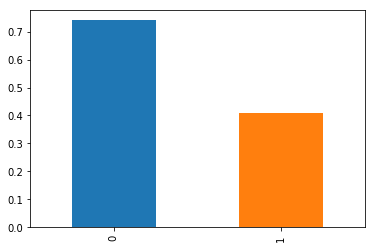

In [3]:
tag_50 = tag.iloc[0:2,]
tag_50['face'].plot(kind='bar')

## 室内图片误检为舌头的FP值（200张）##

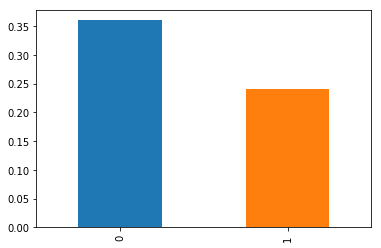

In [4]:
tag_50['inhouse'].plot(kind='bar')

## 室外风景图片误检为舌头的FP值（117张）##

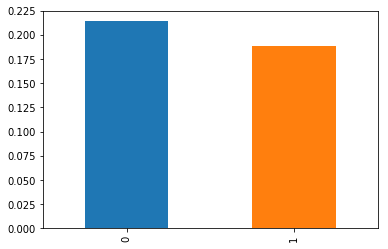

In [5]:
tag_50['nature'].plot(kind='bar')

## 结论 ##
### 原有算法 ###
> 人脸图片误检成舌头的概率高达74%  
室内误检率也很高：36％  
室外风景误检率相对较低，得益于原来算法选取了大量的风景图像作为负样本

### 最新训练的算法（17层）###
> 人脸图片的误检率略高：41％  
室内和室外风景图像误检率都比较低20％左右

## Solution ##
> 继续训练时，着情增加不同类型的负样本，来降低特定场景的误检率  
调整检测模型的参数，在误检率和检测率之间选取一个平衡点  